In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. Import claims_data.csv and cust_data.csv which is provided to you and 
#    combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
claims_data = pd.read_csv('claims.csv')

cust_data = pd.read_csv('cust_demographics.csv')

In [3]:
claims_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [4]:
cust_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [5]:
combined_data = pd.merge(claims_data, cust_data, left_on='customer_id', right_on='CUST_ID', how='inner')

In [6]:
combined_data = combined_data.drop('CUST_ID', axis=1)

In [7]:
combined_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver


In [9]:
#2 Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes 
#of the columns and their business significance

In [8]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  gender               1085 non-null   object 
 11  DateOfBirth          1085 non-null   object 
 12  State                1085 non-null   object 
 13  Contact              1085 non-null   object 
 14  Segment              1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [9]:
missing_values = combined_data.isnull().sum()

In [10]:
missing_values

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
dtype: int64

In [13]:
# 3 Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [11]:
combined_data['claim_amount'] = pd.to_numeric(combined_data['claim_amount'].replace('[\$,]', '', regex=True))

In [12]:
combined_data['claim_amount']


0        2980.0
1        2980.0
2        3369.5
3        1950.0
4        1680.0
         ...   
1080     1770.0
1081     2800.0
1082    33080.0
1083     2840.0
1084     1490.0
Name: claim_amount, Length: 1085, dtype: float64

In [16]:
# Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [13]:
combined_data['unreported_injury'] = (combined_data['claim_type'] == 'Injury only') & ((combined_data['police_report']=='Unknown') | (combined_data['police_report'] == 'NO'))

In [14]:
combined_data['unreported_injury'] = combined_data['unreported_injury'].astype(int)

In [15]:
combined_data['unreported_injury'].value_counts()

unreported_injury
0    1020
1      65
Name: count, dtype: int64

In [16]:
combined_data[combined_data['unreported_injury']==1]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,unreported_injury
80,50337100,15036122,Other driver error,07/20/2018,Auto,Unknown,Injury only,30080.0,1.0,No,Male,30-Mar-88,IA,893-237-4791,Silver,1
82,84635473,74058124,Driver error,01/13/2018,Auto,Unknown,Injury only,21505.0,1.0,Yes,Male,12-Nov-90,WV,172-685-2746,Silver,1
102,712628,74125758,Other causes,11/27/2017,Auto,Unknown,Injury only,22960.0,1.0,No,Male,04-Jan-61,LA,876-786-8624,Gold,1
117,73460630,87993949,Other causes,06/23/2018,Auto,Unknown,Injury only,25783.0,2.0,Yes,Male,29-May-69,NJ,754-586-4891,Platinum,1
119,38446319,55782839,Other causes,12/17/2017,Auto,Unknown,Injury only,21300.0,1.0,No,Female,07-Feb-98,ND,918-849-3279,Gold,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,54131824,39497409,Other driver error,03/01/2018,Auto,Unknown,Injury only,32867.0,3.0,Yes,Female,04-Oct-90,UT,976-537-8734,Silver,1
963,35136402,98401399,Natural causes,09/06/2018,Auto,Unknown,Injury only,24900.0,1.0,No,Female,07-Oct-68,IA,219-593-1674,Silver,1
985,50022306,10198314,Other causes,05/01/2018,Auto,Unknown,Injury only,28658.0,1.0,Yes,Female,10-Nov-80,WI,176-861-1936,Platinum,1
1023,30903408,77134414,Other driver error,01/07/2017,Auto,Unknown,Injury only,28760.0,1.0,No,Male,10-Jul-83,AL,693-239-2865,Silver,1


In [21]:
#5. One customer can claim for insurance more than once and in each claim,multiple categories of claims
#can be involved. However, customer ID should remain unique. 

In [17]:
combined_data = combined_data.drop_duplicates(subset='customer_id')
combined_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,unreported_injury
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,0
6,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,Male,13-May-77,NV,956-871-8691,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum,0
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold,0
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver,0


In [23]:
# 6 Check for missing values and impute the missing values with an appropriate value.
  #(mean for continuous and mode for categorical)


In [18]:
missing_values = combined_data.isnull().sum()


for column in combined_data.columns:
    if combined_data[column].dtype == 'float64':
        combined_data[column].fillna(combined_data[column].mean(), inplace=True)
    elif combined_data[column].dtype == 'object':
        combined_data[column].fillna(combined_data[column].mode()[0], inplace=True)

print(combined_data.isnull().sum())

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
unreported_injury      0
dtype: int64


In [25]:
# 7 Calculate the age of customers in years. Based on the age, categorize thecustomers according to the below criteria
#Children < 18
#Youth 18-30
#Adult 30-60
#Senior > 60

In [22]:
combined_data['DateOfBirth'] = pd.to_datetime(combined_data['DateOfBirth'])
combined_data['Age'] = (datetime.now() - combined_data['DateOfBirth']).astype('<m8[Y]')

bins = [-float('inf'), 18, 30, 60, float('inf')]
labels = ['Children', 'Youth', 'Adult', 'Senior']
combined_data['Age_Group'] = pd.cut(combined_data['Age'], bins=bins, labels=labels, right=False)


print(combined_data[['DateOfBirth', 'Age', 'Age_Group']].head())

ValueError: Cannot convert from timedelta64[ns] to timedelta64[Y]. Supported resolutions are 's', 'ms', 'us', 'ns'

In [27]:
# 8  What is the average amount claimed by the customers from various segments?

In [23]:
average_claim_amount_by_segment = combined_data.groupby('Segment')['claim_amount'].mean()
print(average_claim_amount_by_segment)

Segment
Gold        12756.479697
Platinum    12369.304648
Silver      12269.434851
Name: claim_amount, dtype: float64


In [29]:
#9 What is the total claim amount based on incident cause for all the claims that have been done at least 20 days 
 # prior to 1st of October, 2018.

In [24]:
combined_data['claim_date'] = pd.to_datetime(combined_data['claim_date'])
filtered_data = combined_data[combined_data['claim_date'] <= (datetime(2018, 10, 1) - timedelta(days=20))]
total_claim_amount_by_cause = filtered_data.groupby('incident_cause')['claim_amount'].sum()

In [31]:
total_claim_amount_by_cause

incident_cause
Crime                 7.244625e+05
Driver error          3.264286e+06
Natural causes        1.312706e+06
Other causes          3.725038e+06
Other driver error    3.318806e+06
Name: claim_amount, dtype: float64

In [32]:
#10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [25]:
adults_data = combined_data[(combined_data['Age_Group'] == 'Adult') & (combined_data['State'].isin(['TX', 'DE', 'AK']))]

driver_related_data = adults_data[adults_data['incident_cause'].str.contains('driver', case=False)]


KeyError: 'Age_Group'

In [26]:
driver_related_data

NameError: name 'driver_related_data' is not defined

In [35]:
# 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. 
# Represent the claim amount as a percentage on the pie chart

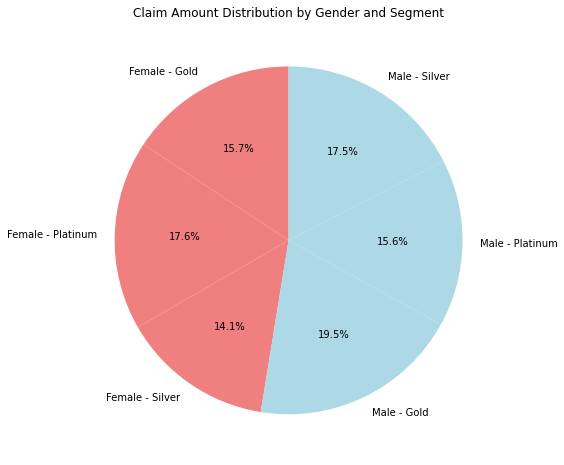

In [36]:
grouped_data = combined_data.groupby(['gender', 'Segment'])['claim_amount'].sum().reset_index()

plt.figure(figsize=(8, 8))
colors = {'Male': 'lightblue', 'Female': 'lightcoral'}
labels = grouped_data['gender'] + ' - ' + grouped_data['Segment']

plt.pie(grouped_data['claim_amount'], labels=labels, autopct='%1.1f%%', startangle=90, colors=[colors[gender] for gender in grouped_data['gender']])
plt.title('Claim Amount Distribution by Gender and Segment')
plt.show()

In [37]:
# 12. Among males and females, which gender had claimed the most for any type of driver related issues?
# E.g. This metric can be compared using a bar chart

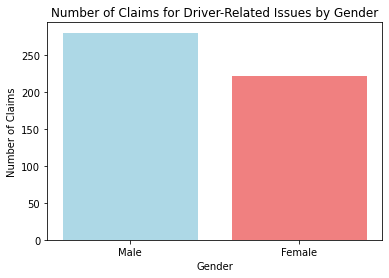

In [38]:
driver_related_data = combined_data[combined_data['incident_cause'].str.contains('driver', case=False)]

# Group by 'gender' and count the number of claims
gender_claim_counts = driver_related_data['gender'].value_counts()

# Plot the bar chart
plt.bar(gender_claim_counts.index, gender_claim_counts.values, color=['lightblue', 'lightcoral'])
plt.title('Number of Claims for Driver-Related Issues by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Claims')
plt.show()

In [39]:
#13 Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

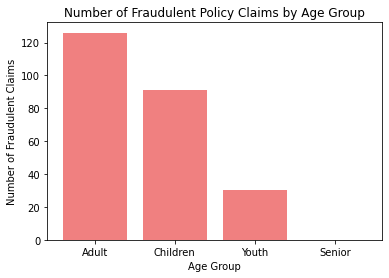

In [40]:
fraudulent_data = combined_data[combined_data['fraudulent'] == 'Yes']
age_group_fraudulent_counts = fraudulent_data['Age_Group'].value_counts()

plt.bar(age_group_fraudulent_counts.index, age_group_fraudulent_counts.values, color='lightcoral')
plt.title('Number of Fraudulent Policy Claims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Fraudulent Claims')
plt.show()


In [41]:
# 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis,
# the month is in a chronological order not alphabetical order

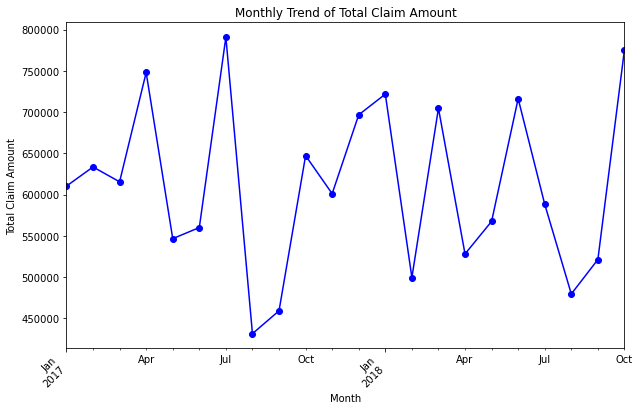

In [42]:
combined_data['claim_month'] = combined_data['claim_date'].dt.to_period('M')
monthly_claim_amount = combined_data.groupby('claim_month')['claim_amount'].sum()

plt.figure(figsize=(10, 6))
monthly_claim_amount.plot(marker='o', color='blue')
plt.title('Monthly Trend of Total Claim Amount')
plt.xlabel('Month')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [43]:
#  15 What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart,
#   one facet that represents fraudulent claims and the other for non-fraudulent claims

<Figure size 864x432 with 0 Axes>

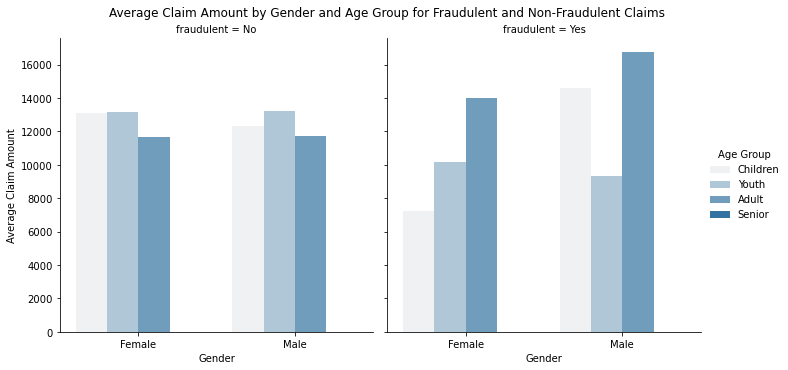

In [44]:
average_claim_amount = combined_data.groupby(['gender', 'Age_Group', 'fraudulent'], as_index=False)['claim_amount'].mean()

# Create a facetted bar chart using seaborn
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(average_claim_amount, col='fraudulent', height=5)
g.map_dataframe(sns.barplot, x='gender', y='claim_amount', hue='Age_Group', ci=None)
g.set_axis_labels('Gender', 'Average Claim Amount')
g.add_legend(title='Age Group')
plt.suptitle('Average Claim Amount by Gender and Age Group for Fraudulent and Non-Fraudulent Claims', y=1.02)
plt.show()

In [45]:
#Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions.
#Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps,
#conclusion from the p-values and the business implications of the statements. 
#16. Is there any similarity in the amount claimed by males and females?

In [46]:
import scipy.stats as stats

males_claim_amount = combined_data.loc[combined_data['gender'] == 'Male', 'claim_amount']
females_claim_amount = combined_data.loc[combined_data['gender'] == 'Female', 'claim_amount']

t_statistic, p_value = stats.ttest_ind(males_claim_amount, females_claim_amount, equal_var=False)

# Print results
print(f'Test Statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in the amount claimed between males and females.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in the amount claimed between males and females.')

Test Statistic: 0.8855042038952904
P-value: 0.3760826268637355
Fail to reject the null hypothesis: There is no significant difference in the amount claimed between males and females.


In [47]:
# 17. Is there any relationship between age category and segment?

In [48]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(combined_data['Age_Group'], combined_data['Segment'])


chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-square Statistic: {chi2_stat}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant relationship between age category and segment.')
else:
    print('Fail to reject the null hypothesis: There is no significant relationship between age category and segment.')


Chi-square Statistic: 1.043152964016894
P-value: 0.9031835083819525
Fail to reject the null hypothesis: There is no significant relationship between age category and segment.


In [49]:
# 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [50]:
from scipy.stats import ttest_1samp
most_recent_year = 2017
current_year_claim_amounts = combined_data.loc[combined_data['claim_date'].dt.year == most_recent_year, 'claim_amount']
population_mean = 10000
t_statistic, p_value = ttest_1samp(current_year_claim_amounts.dropna(), population_mean, alternative='greater')

# Print results
print(f'Test Statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print(f'Reject the null hypothesis: The most recent year ({most_recent_year}) has shown a significant rise in claim amounts.')
else:
    print('Fail to reject the null hypothesis: There is no significant rise in claim amounts compared to the 2016-17 fiscal average.')

Test Statistic: 4.224270855678106
P-value: 1.3861901081119532e-05
Reject the null hypothesis: The most recent year (2017) has shown a significant rise in claim amounts.


In [51]:
# 19. Is there any difference between age groups and insurance claims

In [56]:
# Perform the ANOVA test
from scipy.stats import f_oneway
age_groups = combined_data['Age_Group'].unique()
anova_results = {}

for group in age_groups:
    group_data = combined_data[combined_data['Age_Group'] == group]['claim_amount']
    anova_results[group] = group_data

# Perform the ANOVA test
f_statistic, p_value = f_oneway(*anova_results.values())

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')



F-statistic: 0.054184169685606576
P-value: 0.9472602211730305


In [53]:
# 20. Is there any relationship between total number of policy claims and the claimed amount?


In [57]:
# Choose the relevant columns for the analysis
data_for_correlation = combined_data[['total_policy_claims', 'claim_amount']]
# Check for missing values in the selected columns
missing_values = data_for_correlation.isnull().sum()
print(missing_values)


total_policy_claims    0
claim_amount           0
dtype: int64


In [62]:
from scipy.stats import pearsonr
# Perform the correlation analysis
correlation_coefficient, p_value = pearsonr(data_for_correlation['total_policy_claims'], data_for_correlation['claim_amount'])

print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between the total number of policy claims and the claimed amount.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between the total number of policy claims and the claimed amount.")



Correlation Coefficient: -0.014291136186627362
P-value: 0.6392846937920396
Fail to reject the null hypothesis: There is no significant correlation between the total number of policy claims and the claimed amount.
